In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [4]:
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data.loc[:, 'pickup_date'] = data['pickup_datetime'].dt.date
data.loc[:, 'pickup_hour'] = data['pickup_datetime'].dt.hour
#data.loc[:, 'pickup_date_hour'] = data['pickup_date'] * 24 + data['pickup_hour']
#data['pickup_datehour'] = pd.to_datetime(data.pickup_datehour)

In [5]:
data.head()

id  vendor_id     pickup_datetime     dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  pickup_hour  
0         40.765602                  N            455  2016-03-14           17  
1         40.731152                  N            663  2016-06-12            0  
2         40.710087                  N           2124  2016-01-19           11  
3         40.706718                  N            429  2016-04-06           19  
4         40.782520                  N            435  2016-03-26           13

In [6]:
ts = data.groupby(['pickup_date', 'pickup_hour'])['trip_duration'].sum()

In [8]:
ts2 = data.groupby('pickup_date').sum()

In [45]:
import numpy as np
ts[:,0][180] # find out the length of second index is 
series = np.zeros(24 * 180)

#for i in range(180):
#    for j in range(24):
#        series[24 * i + j] = ts[:,j][i]

        
s = ts.values
t = ts.index.values
series = s

In [50]:
#time_series = np.array([t] ,[s])
df = pd.DataFrame({'time':t, 'duration':s})
df.head()

time  duration
0  (2016-01-01, 0)    526286
1  (2016-01-01, 1)    578927
2  (2016-01-01, 2)    410125
3  (2016-01-01, 3)    548277
4  (2016-01-01, 4)    339044

Plot of all data

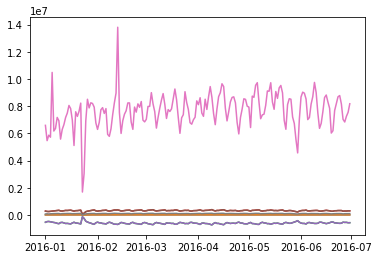

In [11]:
import matplotlib.pyplot as plt
plt.plot(ts2)
#plt.ylim(0,1e6)
#plt.xlim(1200,1248)


Restric Range to 2 days

(1200.0, 1248.0)

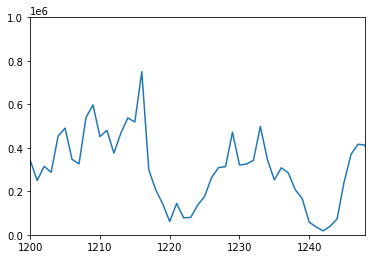

In [26]:
import matplotlib.pyplot as plt
plt.plot(series)
plt.ylim(0,1e6)
plt.xlim(1200,1248)

Let's look at a window of data without outliers

(1200.0, 4000.0)

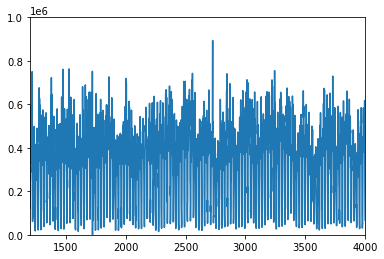

In [27]:
import matplotlib.pyplot as plt
plt.plot(series)
plt.ylim(0,1e6)
plt.xlim(1200,4000)

Lets look at the data over a period of one month

(1200.0, 1872.0)

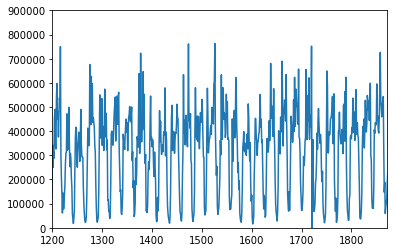

In [28]:
import matplotlib.pyplot as plt
plt.plot(series)
plt.ylim(0,0.9e6)
plt.xlim(1200,1872)

Lets look at the data over a period of one week

(1200.0, 1368.0)

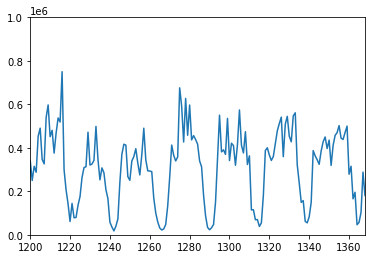

In [29]:
import matplotlib.pyplot as plt
plt.plot(series)
plt.ylim(0,1e6)
plt.xlim(1200,1368)

In [30]:
df.to_csv('taxi-ts.csv', index=False)

In [326]:
df = pd.DataFrame({'time':t, 'duration':s})
df.head()

time  duration
0  (2016-01-01, 0)    526286
1  (2016-01-01, 1)    578927
2  (2016-01-01, 2)    410125
3  (2016-01-01, 3)    548277
4  (2016-01-01, 4)    339044

In [327]:
# Focus in on may to june for data analysis

df = df[2895:4359]
df.head()

time  duration
2895  (2016-05-01, 0)    521210
2896  (2016-05-01, 1)    593315
2897  (2016-05-01, 2)    631350
2898  (2016-05-01, 3)    212444
2899  (2016-05-01, 4)    124065

In [328]:
from datetime import date
from datetime import datetime

In [329]:
df['time'].map(lambda date: date)

2895     (2016-05-01, 0)
2896     (2016-05-01, 1)
2897     (2016-05-01, 2)
2898     (2016-05-01, 3)
2899     (2016-05-01, 4)
              ...       
4354    (2016-06-30, 19)
4355    (2016-06-30, 20)
4356    (2016-06-30, 21)
4357    (2016-06-30, 22)
4358    (2016-06-30, 23)
Name: time, Length: 1464, dtype: object

In [330]:
df['year'] = df['time'].map(lambda date: date[0].year)
df['month'] = df['time'].map(lambda date: date[0].month)
df['day'] = df['time'].map(lambda date: date[0].day)
df['hour'] = df['time'].map(lambda date: date[1])
df.head()

time  duration  year  month  day  hour
2895  (2016-05-01, 0)    521210  2016      5    1     0
2896  (2016-05-01, 1)    593315  2016      5    1     1
2897  (2016-05-01, 2)    631350  2016      5    1     2
2898  (2016-05-01, 3)    212444  2016      5    1     3
2899  (2016-05-01, 4)    124065  2016      5    1     4

In [332]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df2 = df 
df.head()

time  duration  year  month  day  hour            datetime
2895  (2016-05-01, 0)    521210  2016      5    1     0 2016-05-01 00:00:00
2896  (2016-05-01, 1)    593315  2016      5    1     1 2016-05-01 01:00:00
2897  (2016-05-01, 2)    631350  2016      5    1     2 2016-05-01 02:00:00
2898  (2016-05-01, 3)    212444  2016      5    1     3 2016-05-01 03:00:00
2899  (2016-05-01, 4)    124065  2016      5    1     4 2016-05-01 04:00:00

In [333]:
df = df[['datetime', 'duration']]
df.reset_index(drop=True)
df.head()

datetime  duration
2895 2016-05-01 00:00:00    521210
2896 2016-05-01 01:00:00    593315
2897 2016-05-01 02:00:00    631350
2898 2016-05-01 03:00:00    212444
2899 2016-05-01 04:00:00    124065

# Data Analysis

In [334]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [335]:
#mathematical operations
import math
import scipy as sp
import numpy as np

#data handling
import pandas as pd

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
sns.set()

#machine learning and statistical methods
import statsmodels.api as sm

#dataframe index manipulations
import datetime

#selected preprocessing and evaluation methods
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#muting unnecessary warnings if needed
import warnings

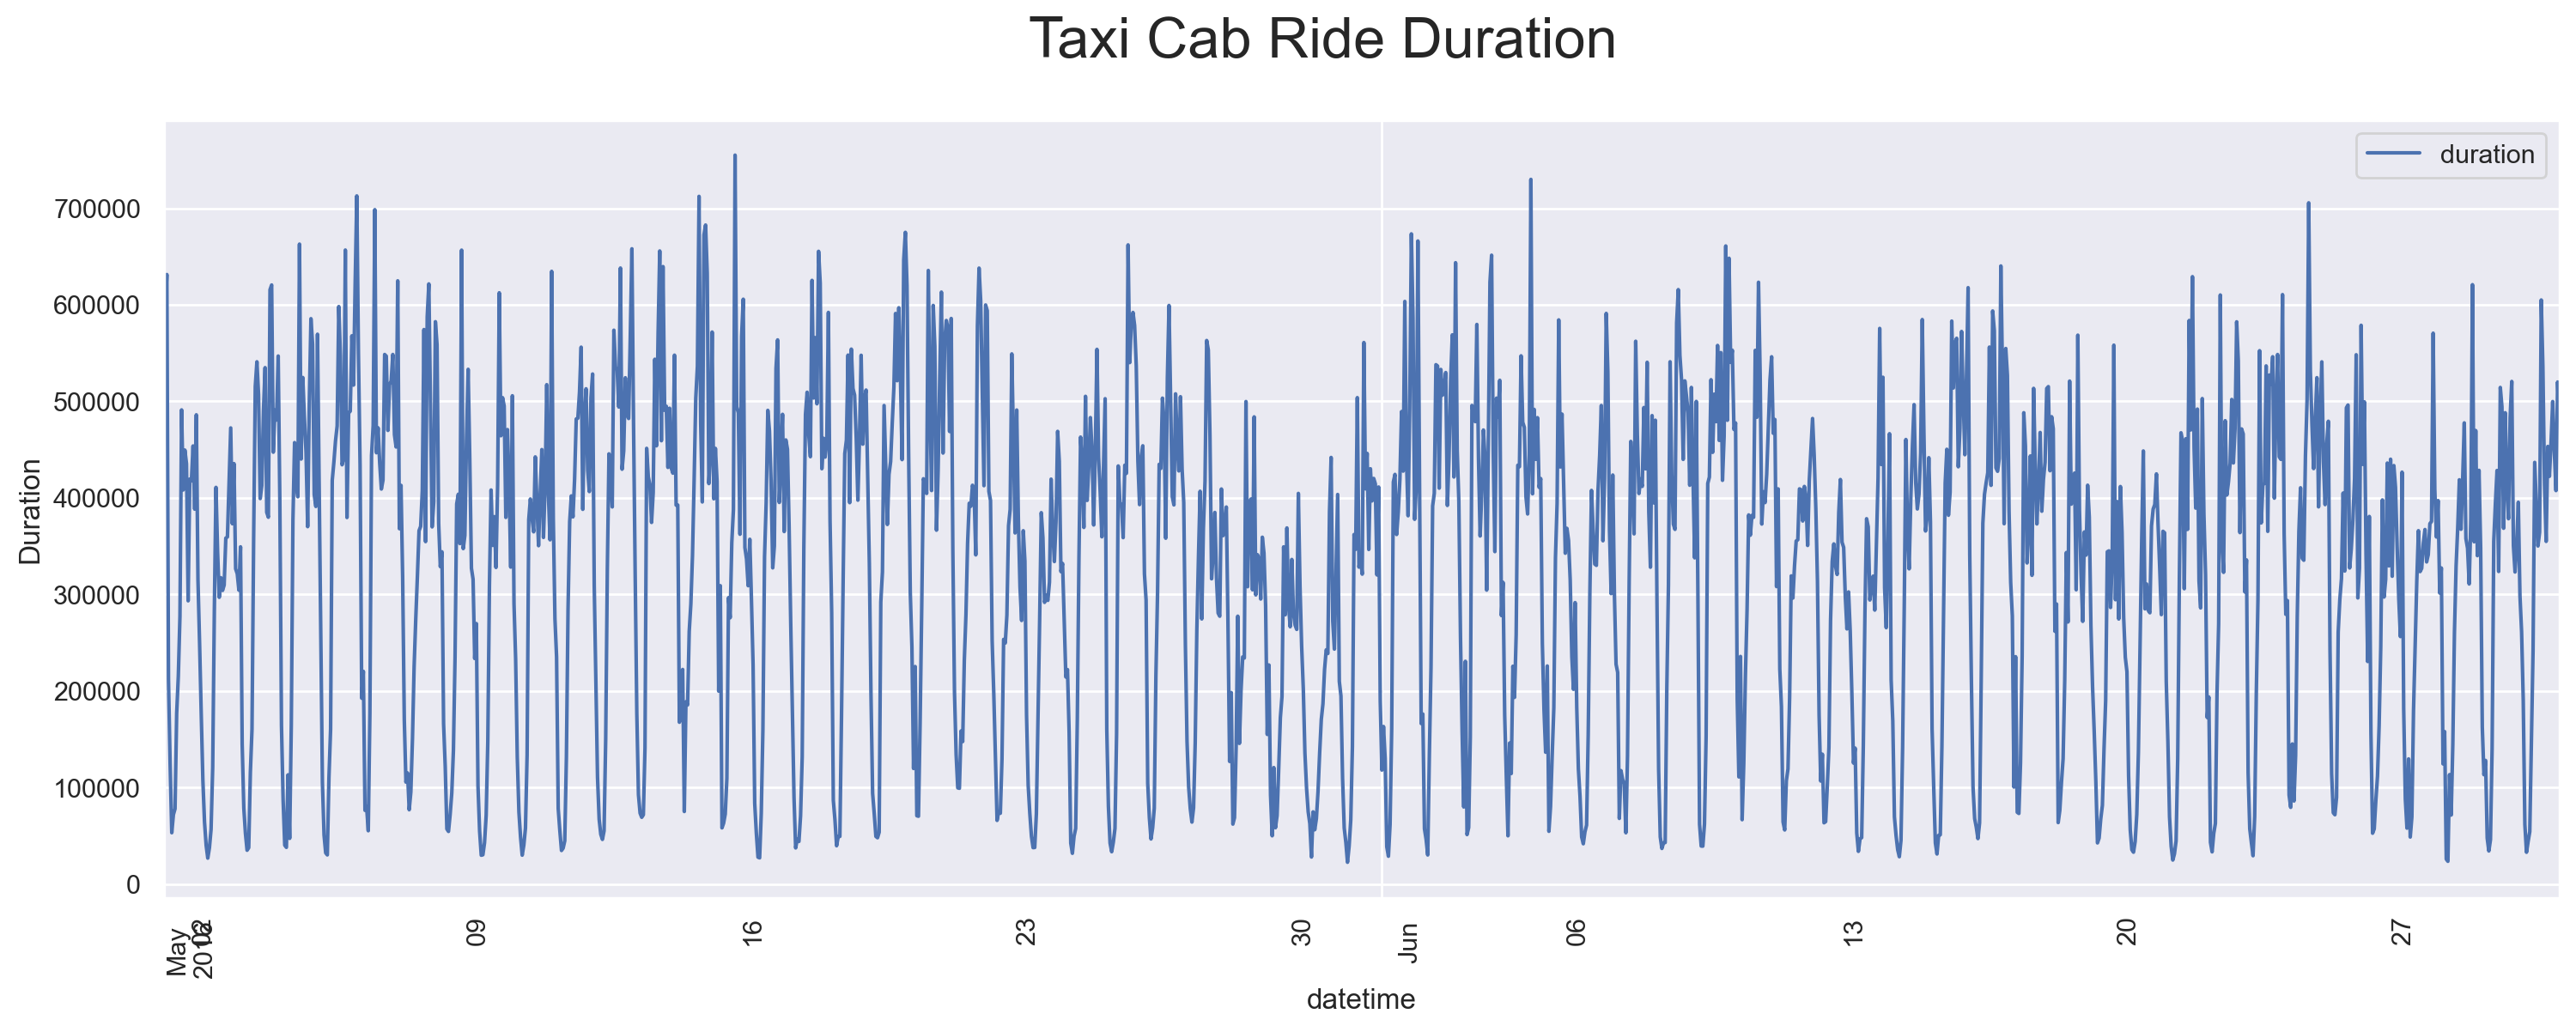

In [336]:
#visual checking of data. Plotting by Pandas method, drawing axes by Matplotlib
f, ax = plt.subplots(figsize=(18,6),dpi=200);
plt.suptitle('Taxi Cab Ride Duration', fontsize=24);
df.plot(x='datetime', y='duration', ax=ax,rot=90,ylabel='Duration');

In [337]:
# split the data into testing and training, leave the last 2 weeks for testing
train = df.iloc[:-336, :]
test = df.iloc[-336:, :]

In [338]:
# daily seasonal component
sd_24 = seasonal_decompose(train['duration'], period=24)

# weekly seasonal component
sd_168 = seasonal_decompose(train['duration'], period=168)

In [339]:
train[:500]['datetime']

2895   2016-05-01 00:00:00
2896   2016-05-01 01:00:00
2897   2016-05-01 02:00:00
2898   2016-05-01 03:00:00
2899   2016-05-01 04:00:00
               ...        
3390   2016-05-21 15:00:00
3391   2016-05-21 16:00:00
3392   2016-05-21 17:00:00
3393   2016-05-21 18:00:00
3394   2016-05-21 19:00:00
Name: datetime, Length: 500, dtype: datetime64[ns]

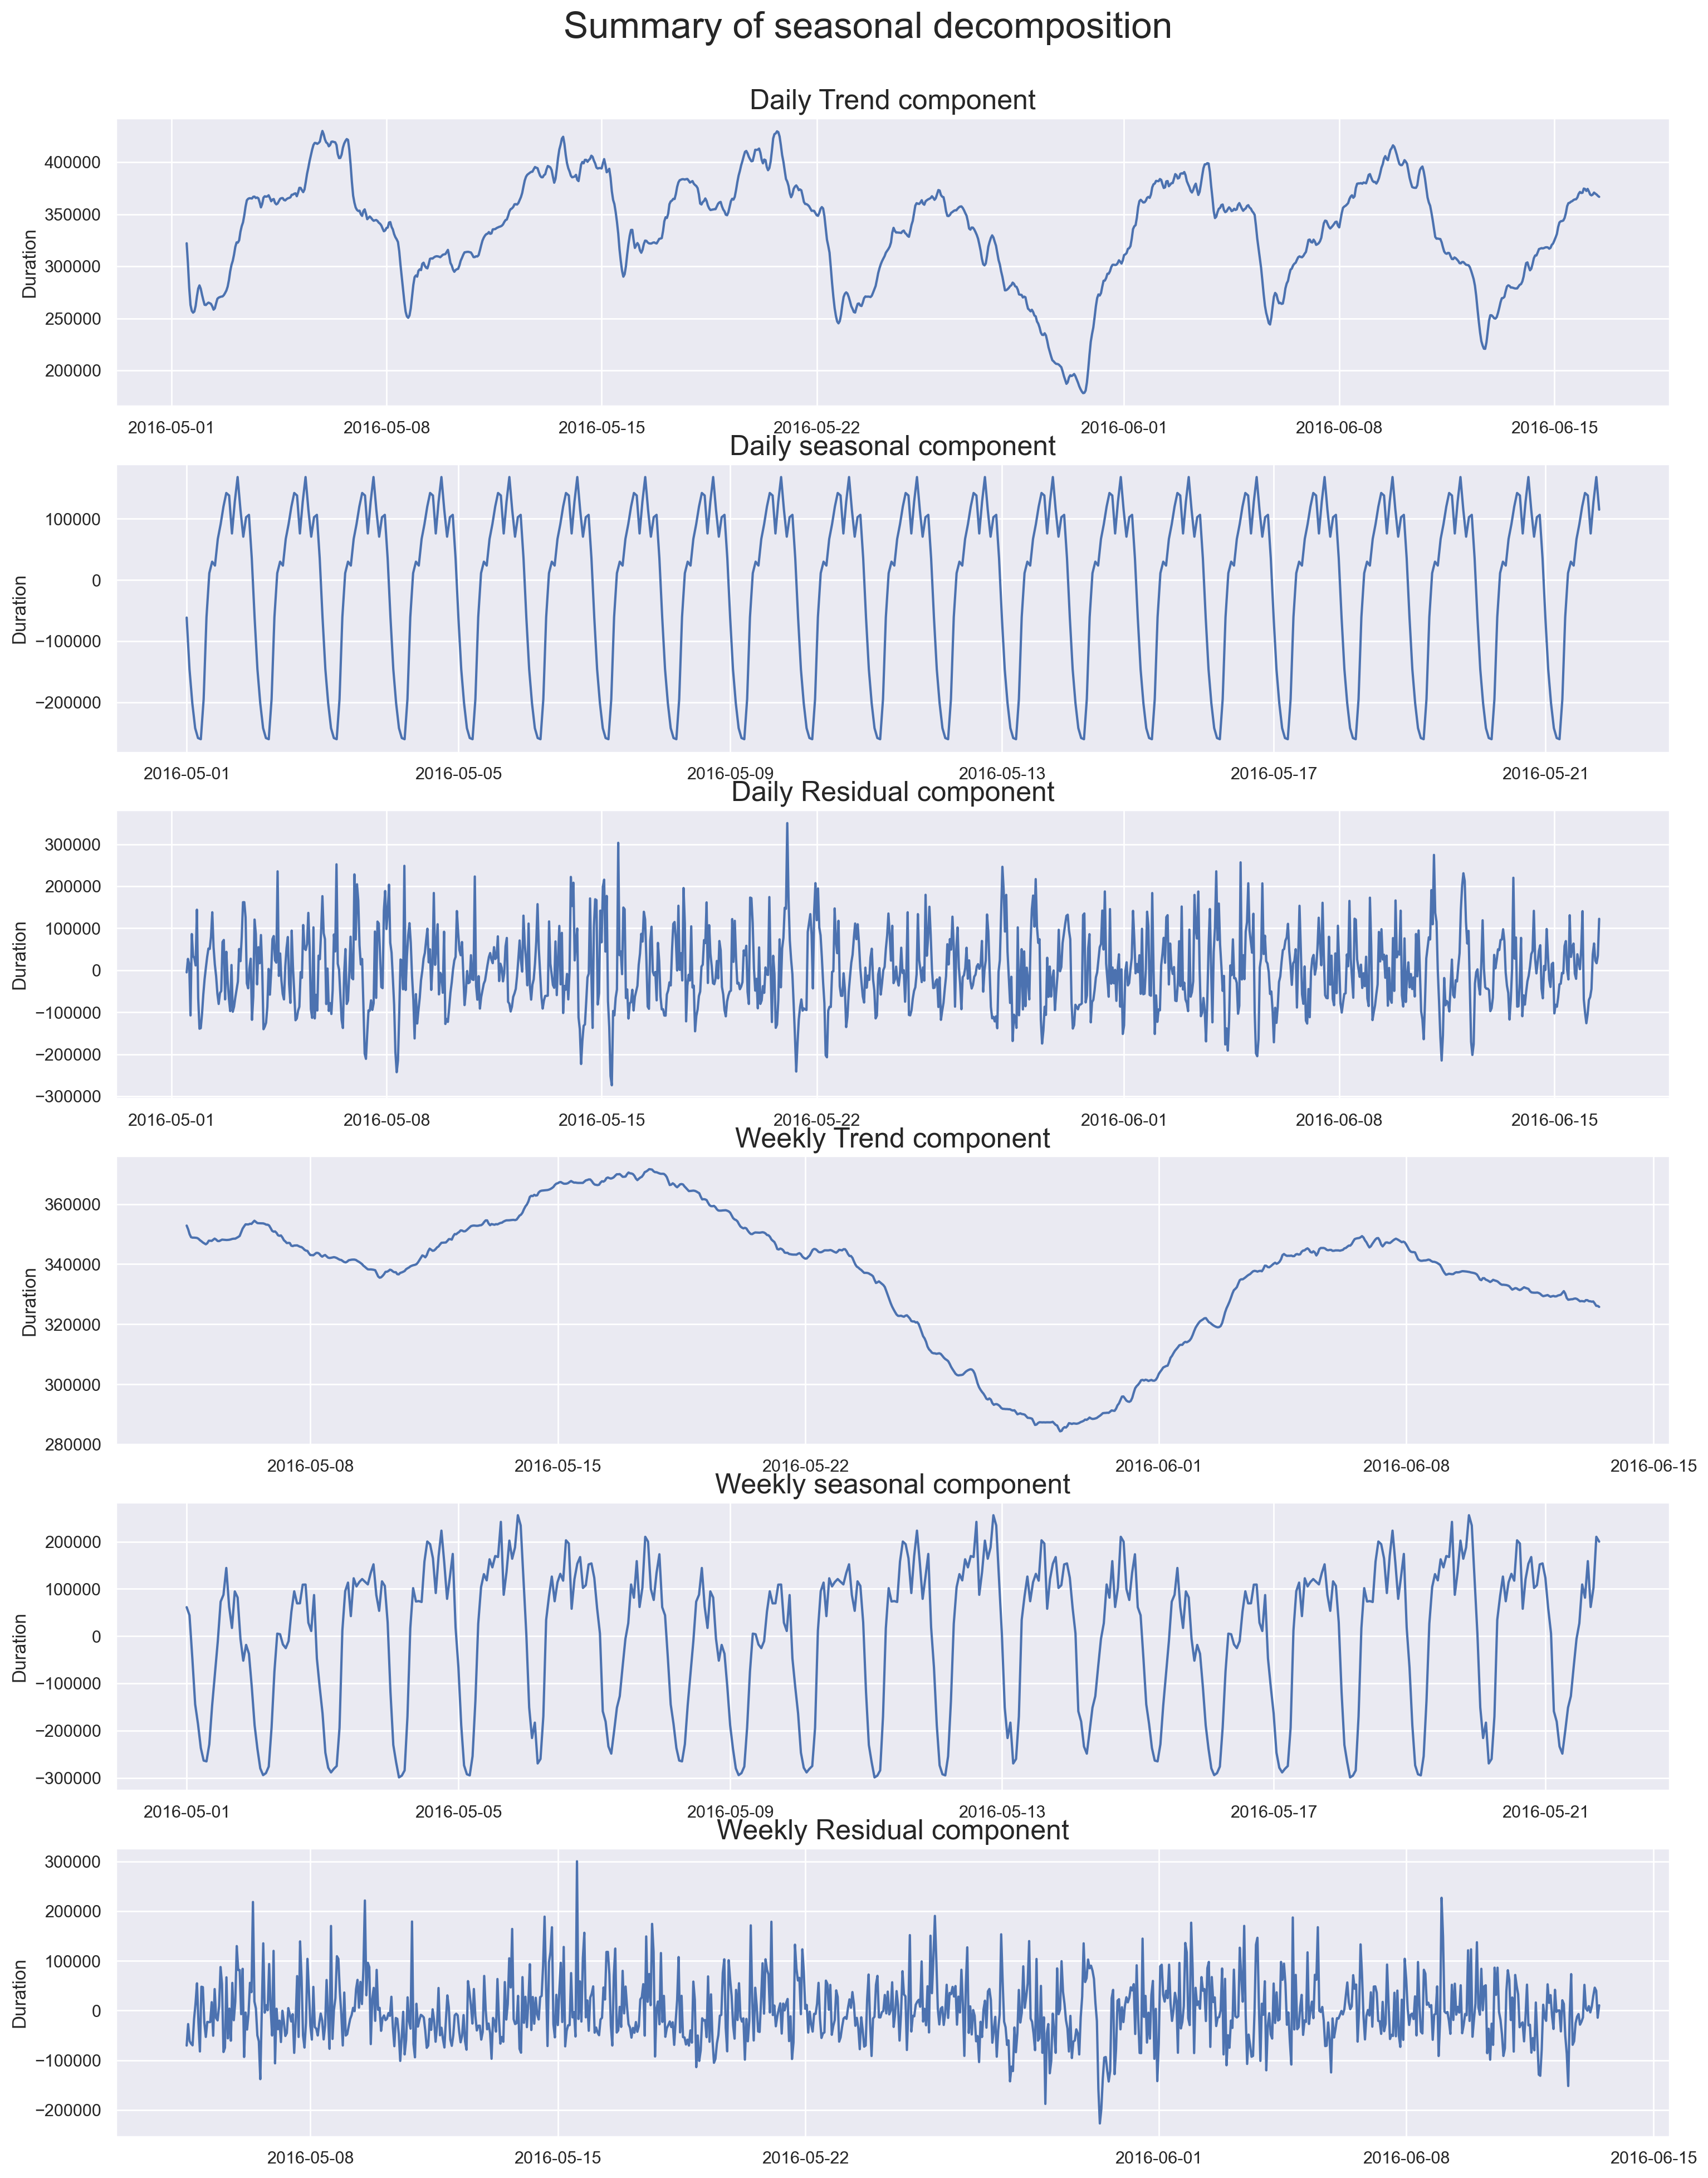

In [340]:
#drawing figure with subplots, predefined size and resolution
f, axes = plt.subplots(6,1,figsize=(18,24),dpi=200);

#setting figure title and adjusting title position and size
plt.suptitle('Summary of seasonal decomposition', y=0.92, fontsize=24);

#plotting trend component
axes[0].plot(train['datetime'], sd_24.trend)
axes[0].set_title('Daily Trend component', fontdict={'fontsize': 18});

#drawing black dashed vertical lines between y axis limits
#axes[0].vlines(datetime.datetime(2008,1,1), axes[0].get_ylim()[0], axes[0].get_ylim()[1], colors='black', linestyles='dashed');
#axes[0].vlines(datetime.datetime(2011,1,1), axes[0].get_ylim()[0], axes[0].get_ylim()[1], colors='black', linestyles='dashed');

#placing three comments in text boxes
# axes[0].text(datetime.datetime(2006,6,1), 15000, 'Increasing trend',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'));
# axes[0].text(datetime.datetime(2009,8,1), 14750, 'Global Financial Crisis \n (GFC) and recovery',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'));
# axes[0].text(datetime.datetime(2015,1,1), 16000, 'Decreasing trend',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'));


#plotting daily seasonal component
axes[1].plot(train[:500]['datetime'], sd_24.seasonal[:500]);
axes[1].set_title('Daily seasonal component', fontdict={'fontsize': 18});
# axes[1].annotate('Higher \n daytime values', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.9, 0.9),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'));
# axes[1].annotate('Lower \n nighttime values', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.9, 0.1),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'));


#plotting residual of daily decomposition
axes[2].plot(train['datetime'], sd_24.resid);
axes[2].set_title('Daily Residual component', fontdict={'fontsize': 18});

#plotting weekly trend component
axes[3].plot(train['datetime'], sd_168.trend)
axes[3].set_title('Weekly Trend component', fontdict={'fontsize': 18});

#plotting weekly seasonal component
axes[4].plot(train[:500]['datetime'], sd_168.seasonal[:500]);
axes[4].set_title('Weekly seasonal component', fontdict={'fontsize': 18});

#placing comment in annotation with text box and arrow
# axes[4].annotate('Leaked daily \n seasonal effects', xy=(0.50, 0.75),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.50, 0.25),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='->',
#                             connectionstyle='arc3'));
# axes[4].annotate('Weekdays', xy=(0.20, 0.75),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.20, 0.40),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='-[',
#                             mutation_scale=45,
#                             connectionstyle='arc3'));
# axes[4].annotate('Weekends', xy=(0.28, 0.55),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.28, 0.90),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='-[',
#                             mutation_scale=17,
#                             connectionstyle='arc3'));

#plotting residual of weekly decomposition
axes[5].plot(train['datetime'], sd_168.resid);
axes[5].set_title('Weekly Residual component', fontdict={'fontsize': 18});

#setting label for each y axis
for a in axes:
    a.set_ylabel('Duration');
    
plt.show();

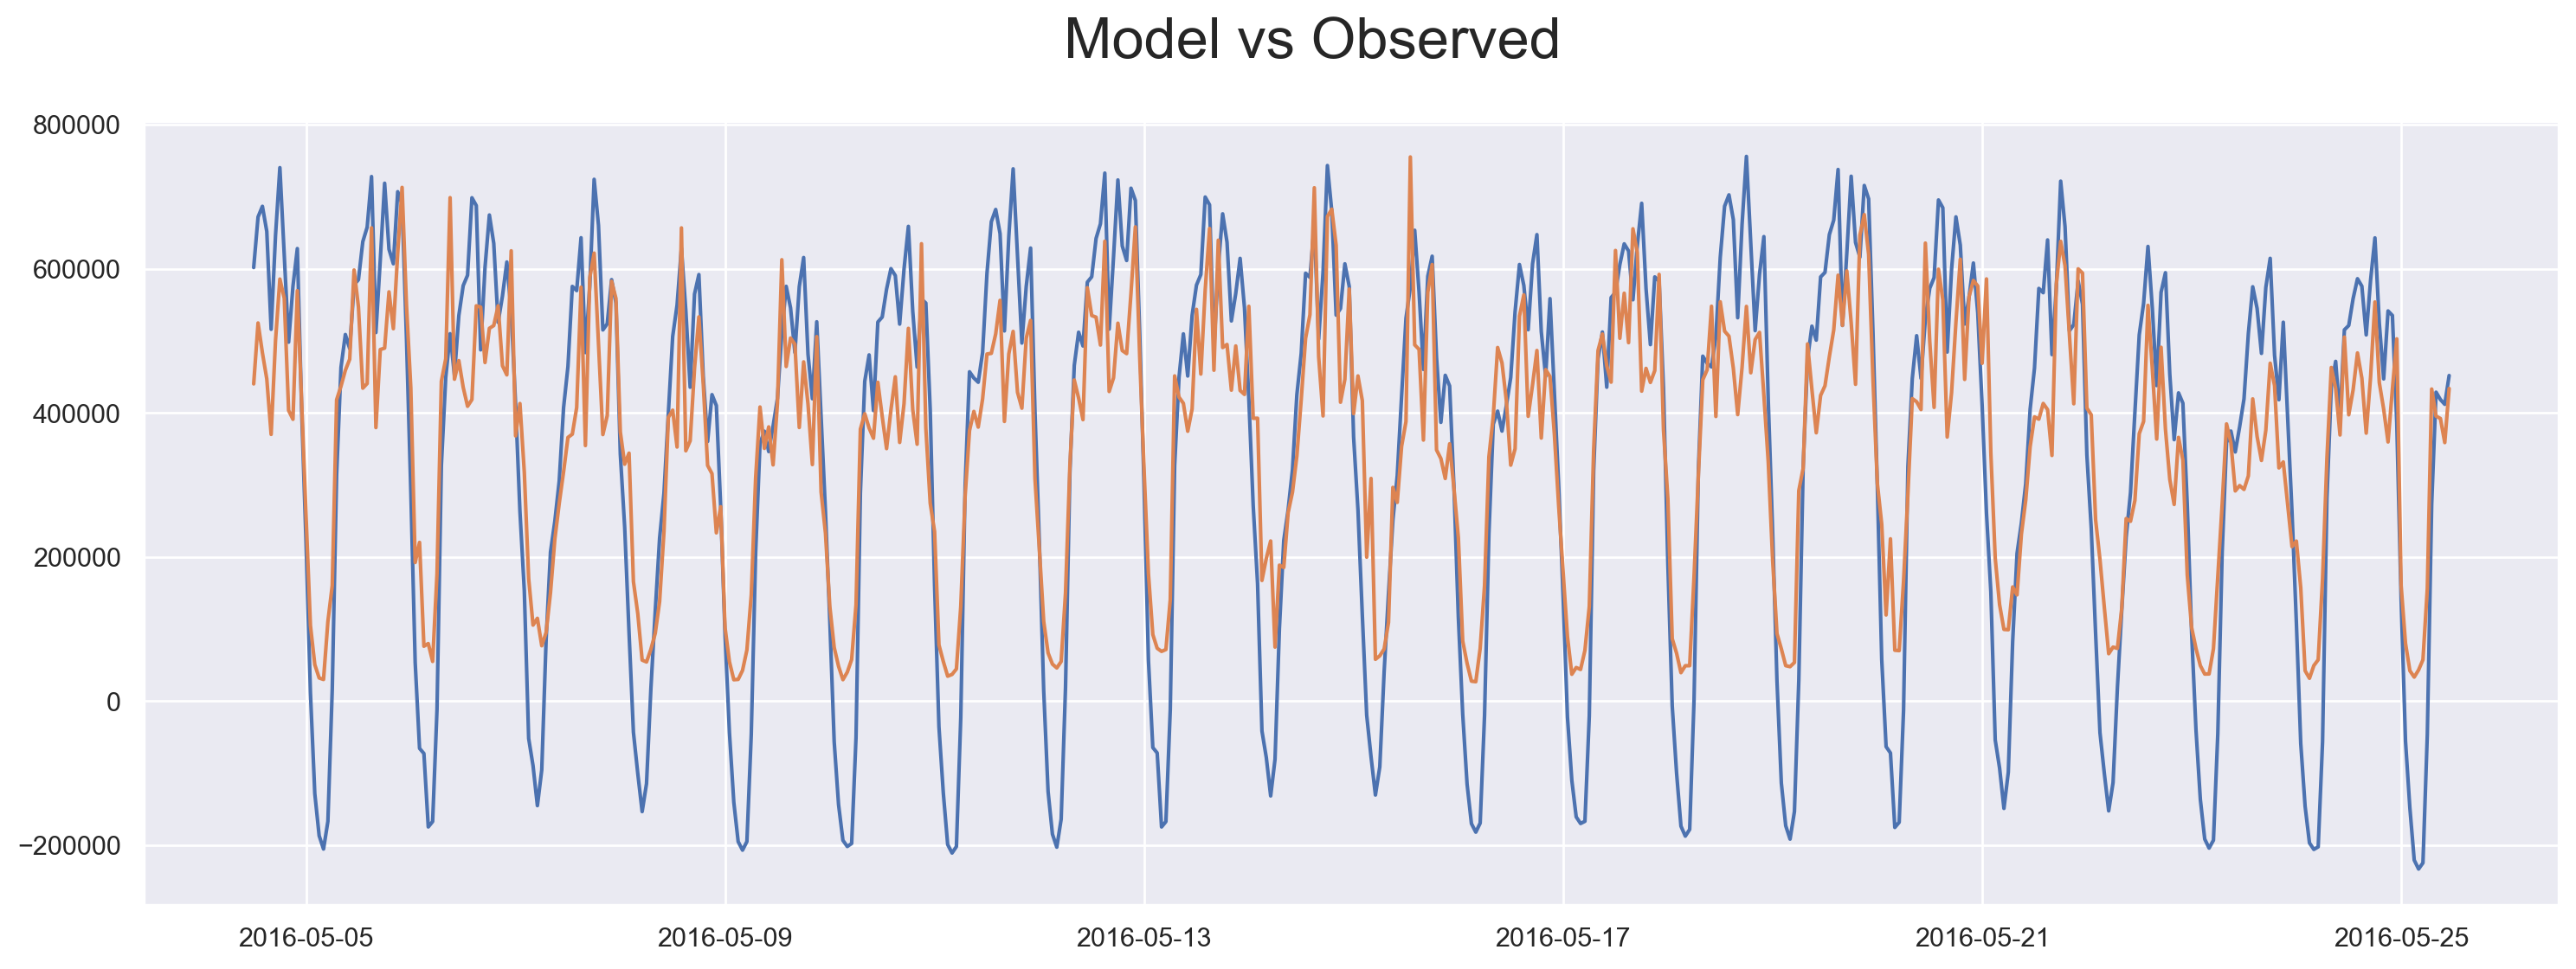

In [341]:
# plot the observed data vs predictions

warnings.filterwarnings("ignore")

# model data is the sum of components (why use only weekly trend?)
m_data = sd_168.trend + + sd_168.seasonal + sd_24.seasonal

# 3 week  period
START = 84
END = START + 3*168

# draw figure for plotting model data
f, axes = plt.subplots(figsize=(18,6),dpi=200)
plt.suptitle('Model vs Observed', fontsize=24)
axes.plot(train[START:END]['datetime'], m_data[START:END], label="model")
axes.plot(train[START:END]['datetime'], train[START:END]['duration'], label='observed')

plt.show()

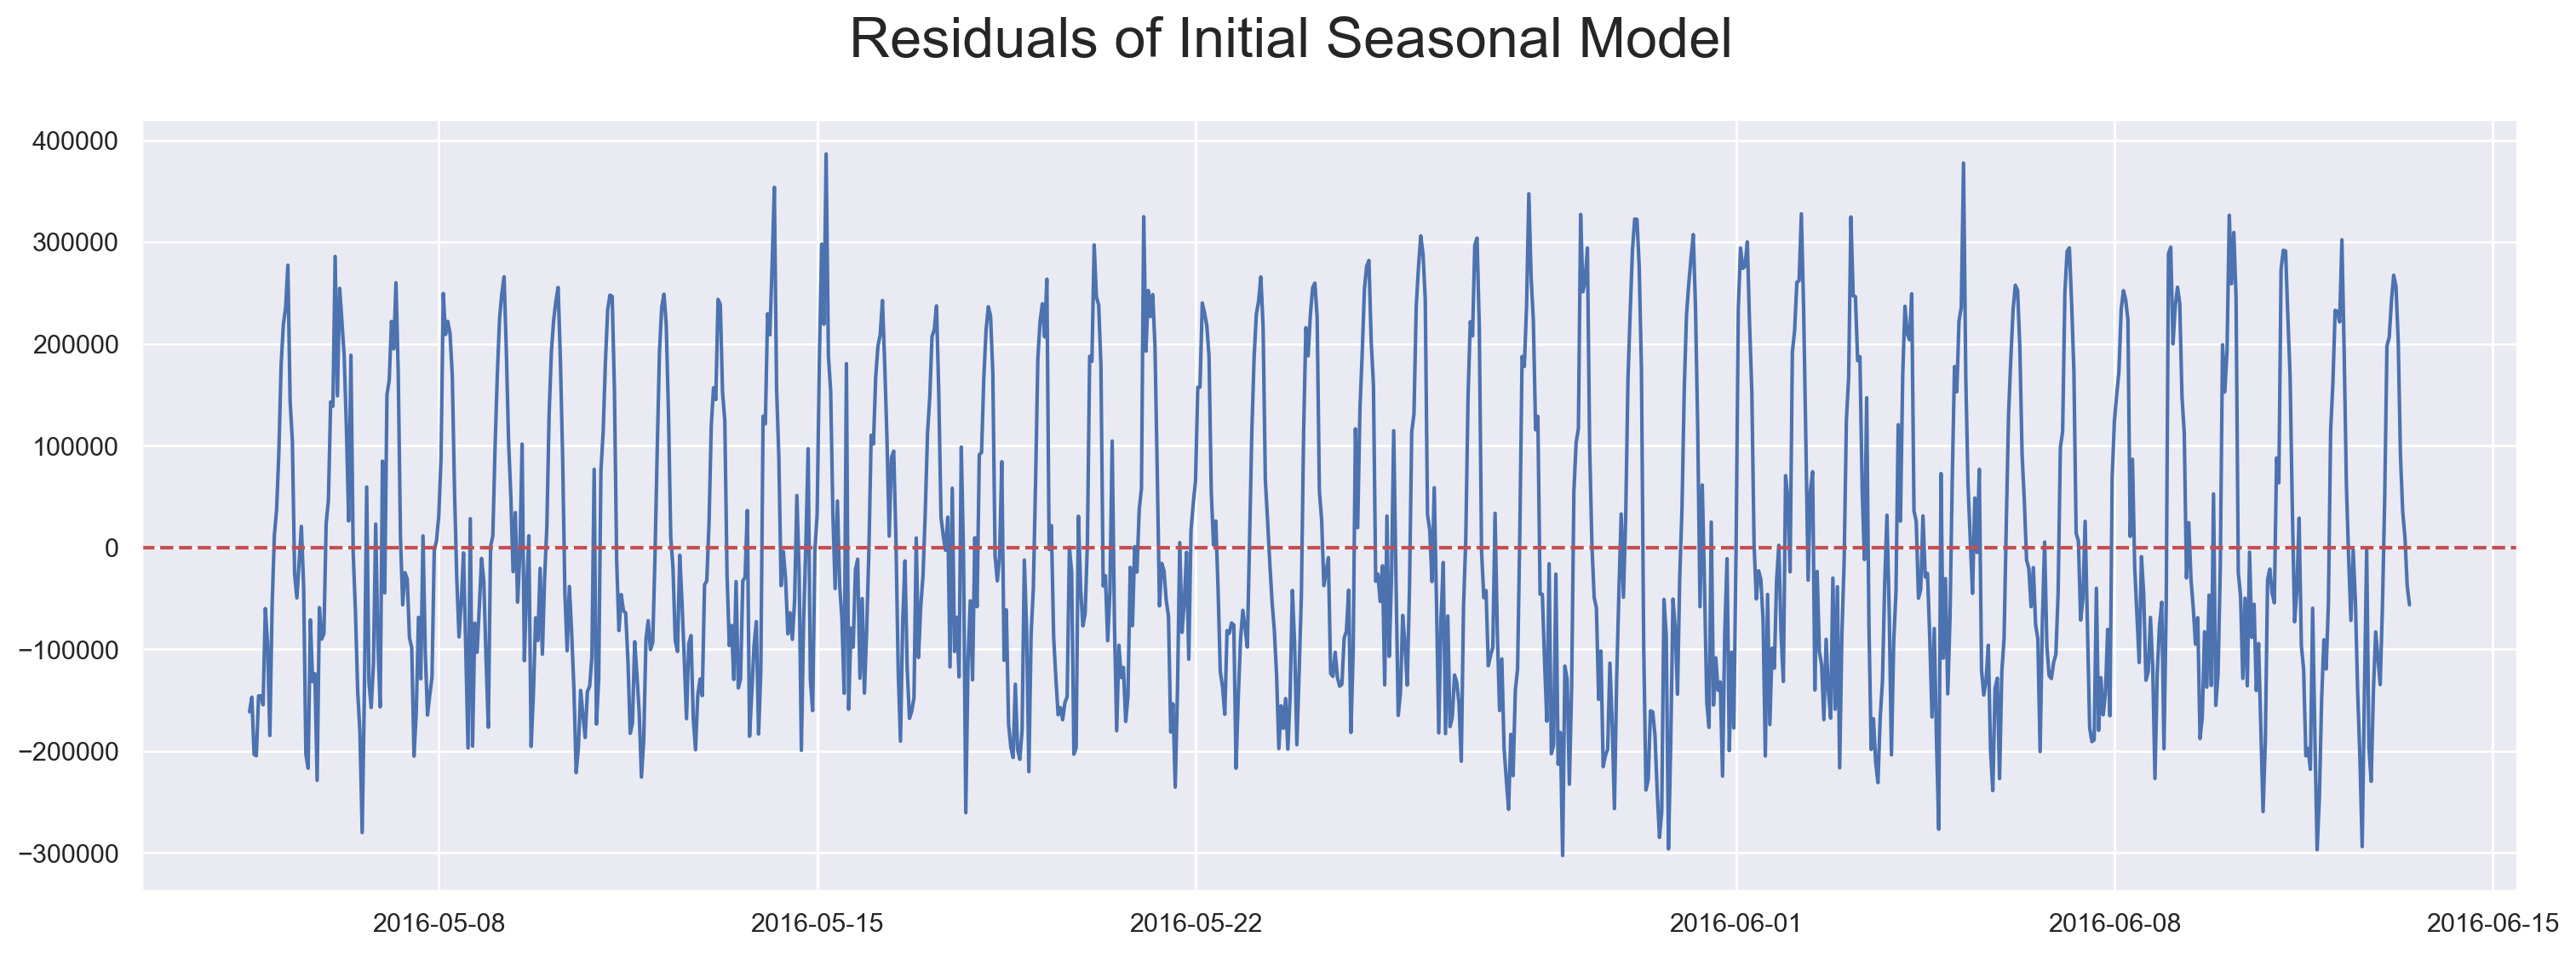

In [342]:
resid = train['duration'] - m_data
# draw figure for plotting model data
END = -START
f, axes = plt.subplots(figsize=(18,6),dpi=200)
plt.suptitle('Residuals of Initial Seasonal Model', fontsize=24)
axes.plot(train[START:END]['datetime'], resid[START:END], label="model")
axes.axhline(y=0, color='r' ,linestyle='--')
plt.show()

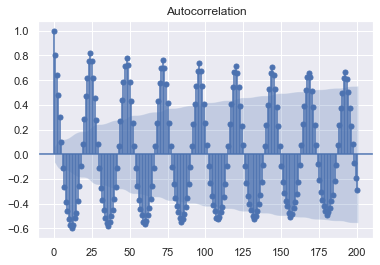

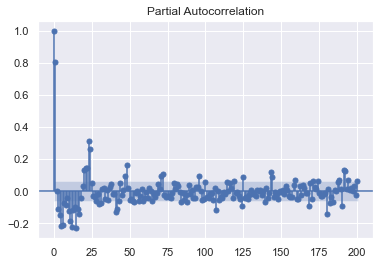

In [343]:
plot_acf(resid[84:-84], lags=200)
plot_pacf(resid[84:-84], lags=200)
plt.show()

# Fourier Analysis on Original Data

This seems to have gone mostly unsucsefully.  Probably becuase I don't really understand how fft works for this.

In [279]:
import scipy
from scipy import signal

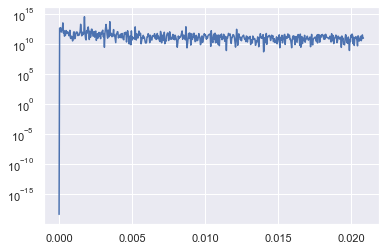

In [302]:
f, Pxx_den = signal.periodogram(train['duration'], fs=1/24)
plt.semilogy(f, Pxx_den)
#plt.xlim(right=168)
#plt.ylim(-10e11, 10e11)
plt.show()

In [313]:
inter_sample_time = train['datetime'][1] - df['datetime'][0]
np.diff(train['datetime'])[0]

numpy.timedelta64(3600000000000,'ns')

In [314]:
sampling_freq = 1/3600000000000

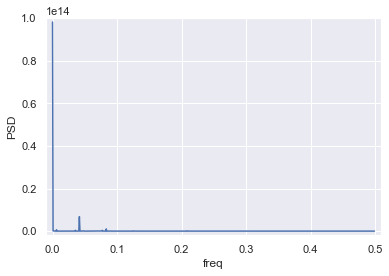

In [324]:
# Determine frequencies
f = np.fft.fftfreq(len(train)) 

# Compute power spectral density
psd = np.abs(np.fft.fft(train['duration']))**2 / len(df)

# Make plot
plt.plot(f[f>=0], psd[f>=0])
plt.xlabel('freq')
plt.ylabel('PSD')
plt.margins(0.02)

In [325]:
psd_pos= psd[f>0]
f[np.argmax(psd_pos)]

0.04078014184397163

# Decision Tree

In [349]:
df2 = df2.drop(columns=['time', 'datetime'])
df2.head()

duration  year  month  day  hour
2895    521210  2016      5    1     0
2896    593315  2016      5    1     1
2897    631350  2016      5    1     2
2898    212444  2016      5    1     3
2899    124065  2016      5    1     4

In [350]:
# split the data into testing and training, leave the last 2 weeks for testing
train = df2.iloc[:-336, :]
test = df2.iloc[-336:, :]

In [356]:
def getXy(data, label_name):
    return data.drop(columns=label_name), data[label_name]

X_train, y_train = getXy(train, 'duration')
X_test, y_test = getXy(test, 'duration')

In [387]:
from sklearn.tree import DecisionTreeRegressor

# Fit the model
reg_1 = DecisionTreeRegressor(max_depth=1)
reg_2 = DecisionTreeRegressor(max_depth=2)
reg_3 = DecisionTreeRegressor(max_depth=3)
reg_4 = DecisionTreeRegressor(max_depth=4)
reg_5 = DecisionTreeRegressor()
reg_1.fit(X_train, y_train)
reg_2.fit(X_train, y_train)
reg_3.fit(X_train, y_train)
reg_4.fit(X_train, y_train)
reg_5.fit(X_train, y_train)

# Predict
y1_hat = reg_1.predict(X_test)
y2_hat = reg_2.predict(X_test)
y3_hat = reg_3.predict(X_test)
y4_hat = reg_4.predict(X_test)
y5_hat = reg_5.predict(X_test)

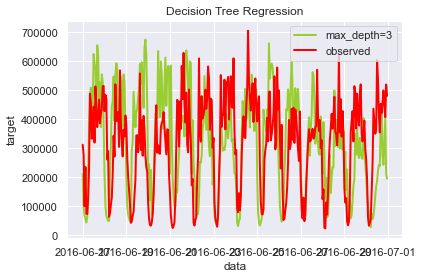

In [396]:
# Plot the results
plt.figure()
#plt.scatter(df['datetime'], y_train, s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(df[-336:]['datetime'], y1_hat, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(df[-336:]['datetime'], y5_hat, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(df[-336:]['datetime'], y_test, color="red", label="observed", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [390]:
from sklearn.metrics import mean_squared_error

print("model 1 train mse: {:.2f}".format(mean_squared_error(y_train, reg_1.predict(X_train))))
print("model 2 train mse: {:.2f}".format(mean_squared_error(y_train, reg_2.predict(X_train))))
print("model 3 train mse: {:.2f}".format(mean_squared_error(y_train, reg_3.predict(X_train))))
print("model 4 train mse: {:.2f}".format(mean_squared_error(y_train, reg_4.predict(X_train))))
print("model 5 train mse: {:.2f}".format(mean_squared_error(y_train, reg_5.predict(X_train))))

print("model 1 test mse:  {:.2f}".format(mean_squared_error(y_test, y1_hat)))
print("model 2 test mse:  {:.2f}".format(mean_squared_error(y_test, y2_hat)))
print("model 3 test mse:  {:.2f}".format(mean_squared_error(y_test, y3_hat)))
print("model 4 test mse:  {:.2f}".format(mean_squared_error(y_test, y4_hat)))
print("model 5 test mse:  {:.2f}".format(mean_squared_error(y_test, y5_hat)))

model 1 train mse: 14402854205.41
model 2 train mse: 12799443332.41
model 3 train mse: 10932164224.30
model 4 train mse: 10316276498.70
model 5 train mse: 0.00
model 1 test mse:  11821195504.98
model 2 test mse:  13277682871.24
model 3 test mse:  12782335808.41
model 4 test mse:  14109734083.67
model 5 test mse:  28045050220.57


In [398]:
resid_5 = y_train - reg_5.predict(X_train)
resid_5

2895    0.0
2896    0.0
2897    0.0
2898    0.0
2899    0.0
       ... 
4018    0.0
4019    0.0
4020    0.0
4021    0.0
4022    0.0
Name: duration, Length: 1128, dtype: float64

In [403]:
max_depth = [None, 1, 2, 3, 5]
min_samples_split = [2, 5, 10, 20, 50]
min_samples_leaf = [1, 2, 5, 10, 20, 50]
max_leaf_nodes = [None, 24, 168]
min_weight_fraction_leaf = [0.0, 0.01]
min_impurity_decrease = [0.0, 0.01, 0.1]
ccp_alpha = [0.0, 0.01, 0.1]

model_dict = {
    'models': [],
    'train_mse': [],
    'test_mse': []
}

for depth in max_depth:
    for mss in min_samples_split:
        for msl in min_samples_leaf:
            for mln in max_leaf_nodes:
                for mwfl in min_weight_fraction_leaf:
                    for mid in min_impurity_decrease:
                        for ccp in ccp_alpha:
                            regressor = DecisionTreeRegressor(max_depth=depth,
                                                             min_samples_split=mss,
                                                             min_samples_leaf=msl,
                                                             max_leaf_nodes=mln,
                                                             min_weight_fraction_leaf=mwfl,
                                                             min_impurity_decrease=mid,
                                                             ccp_alpha=ccp)
                            regressor.fit(X_train, y_train)
                            model_dict['models'].append(regressor)
                            model_dict['train_mse'].append(mean_squared_error(y_train, regressor.predict(X_train)))
                            model_dict['test_mse'].append(mean_squared_error(y_test, regressor.predict(X_test)))

In [474]:
mse = np.array(model_dict['test_mse'])
idx = np.argsort(mse)


best = model_dict['models'][idx[0]]
print(mse[idx[0]])
best

11821195504.977251


DecisionTreeRegressor(ccp_alpha=0.01, max_depth=1, min_impurity_decrease=0.01,
                      min_samples_leaf=5, min_samples_split=10,
                      min_weight_fraction_leaf=0.01)

In [475]:
yhat = best.predict(X_test)
resid_test = y_test - yhat
resid_train = y_train - best.predict(X_train)

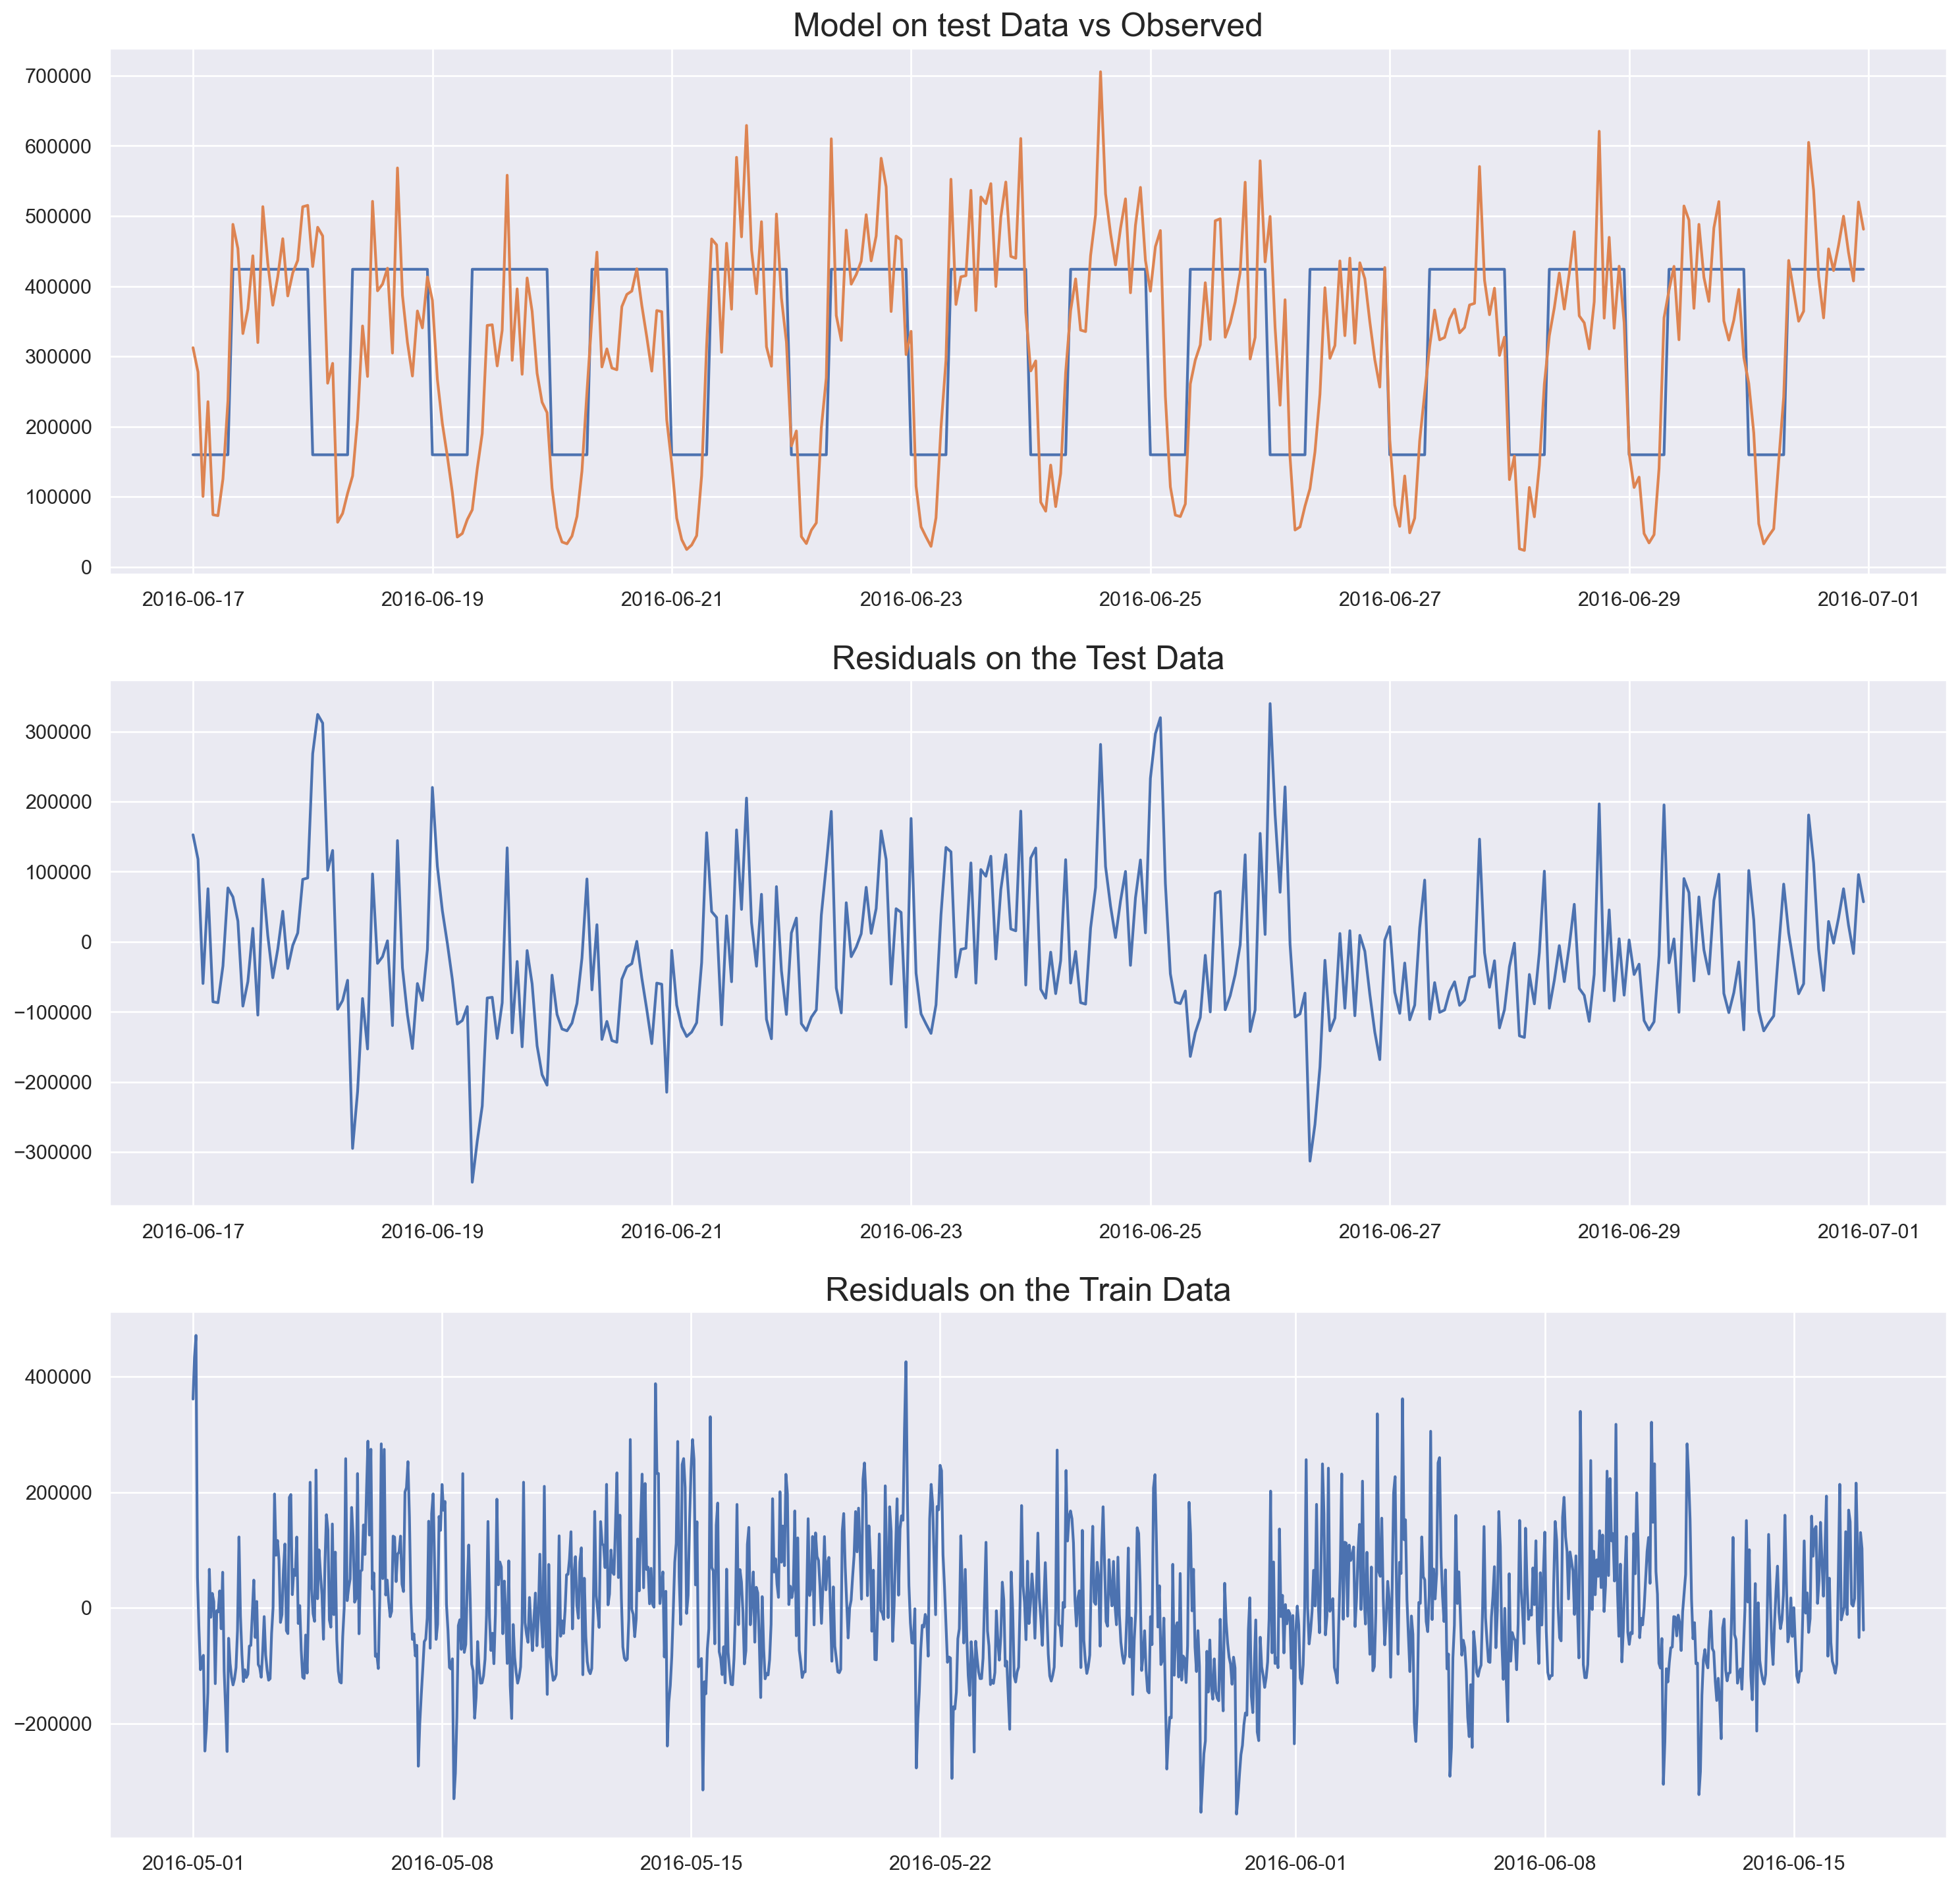

In [476]:
#drawing figure with subplots, predefined size and resolution
f, axes = plt.subplots(3, 1, figsize=(18,18),dpi=200)
axes[0].plot(df['datetime'][-336:], yhat, label="model")
axes[0].plot(df['datetime'][-336:], y_test, label="observed")
axes[0].set_title('Model on test Data vs Observed', fontdict={'fontsize': 18});

# f, axes = plt.subplots(3,1,figsize=(18,24),dpi=200);
axes[1].plot(df['datetime'][-336:], resid_test)
axes[1].set_title('Residuals on the Test Data', fontdict={'fontsize': 18});

# f, axes = plt.subplots(3,1,figsize=(18,24),dpi=200);
axes[2].plot(df['datetime'][:-336], resid_train)
axes[2].set_title('Residuals on the Train Data', fontdict={'fontsize': 18});

plt.show()


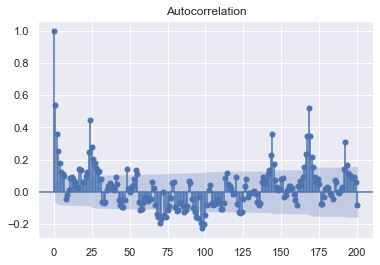

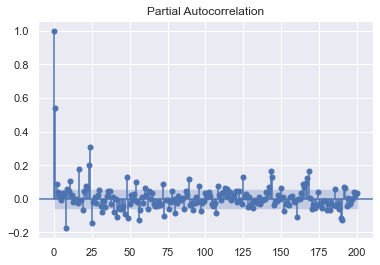

In [477]:
plot_acf(resid_train, lags=200)
plot_pacf(resid_train, lags=200)
plt.show()

# XG Boost Tree
source: https://machinelearningmastery.com/xgboost-for-time-series-forecasting/ 

not yet working

In [478]:
!pip install xgboost

In [481]:
# xgboost
import xgboost
print("xgboost", xgboost.__version__)

xgboost 1.6.0


In [483]:
# define model
model = xgboost.XGBRegressor()

In [651]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [652]:
df['duration']

2895    521210
2896    593315
2897    631350
2898    212444
2899    124065
         ...  
4354    499773
4355    448043
4356    407498
4357    520006
4358    481216
Name: duration, Length: 1464, dtype: int64

>expected=436166.0, predicted=381497.9
>expected=471587.0, predicted=494543.1
>expected=582373.0, predicted=565992.0
>expected=541796.0, predicted=423295.6
>expected=363948.0, predicted=411184.2
>expected=471385.0, predicted=491687.8
>expected=466148.0, predicted=465157.5
>expected=302540.0, predicted=301916.9
>expected=335702.0, predicted=242941.1
>expected=114976.0, predicted=160949.6
>expected=57132.0, predicted=62757.0
>expected=42679.0, predicted=43486.8
>expected=29227.0, predicted=53125.1
>expected=69908.0, predicted=51304.3
>expected=198468.0, predicted=169553.1
>expected=294393.0, predicted=313326.7
>expected=552458.0, predicted=365306.3
>expected=373988.0, predicted=432247.3
>expected=413425.0, predicted=436665.5
>expected=415015.0, predicted=507173.8
>expected=536677.0, predicted=437090.4
>expected=365256.0, predicted=469169.0
>expected=527185.0, predicted=463490.2
>expected=517689.0, predicted=518192.0
>expected=546174.0, predicted=424968.8
>expected=399648.0, predicted=417

ValueError: x and y must have same first dimension, but have shapes (168,) and (200,)

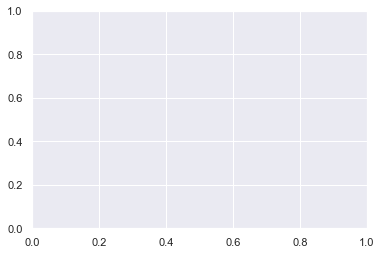

In [715]:
LABEL_NAME = 'var1(t)'

def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    test_iloc = test.iloc()
    #print(test.iloc()[0])
    # seed history with training dataset
    #print(train)
    #history = [x for x in train]
    history = train
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test_iloc[i, :-1], test_iloc[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        #print("append test:")
        #print([test_iloc[i][0], test_iloc[i][1]])
        history.append([test_iloc[i][0], test_iloc[i][1]])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    #print(test.iloc[:, -1])
    error = mean_squared_error(test.iloc[:, -1], predictions)
    return error, test.iloc[:, 1], predictions

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:][:-n_test], data[:][-n_test:]

def xgboost_forecast(train, testX):
    # transform list into array
    train = np.asarray(train)
    #print(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=168)
    #print(trainX)
    #print(trainy)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

series = df.drop(columns='datetime').to_numpy()
data = series_to_supervised(series, 168)
#print(data)
mae, y, yhat = walk_forward_validation(data, 200)
print('MAE: %.3f' % mae)
# plot expected vs preducted
plt.plot(range(168), y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [706]:
# plot expected vs preducted
plt.plot(range(168), y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

1463    279290.0
Name: var1(t-167), dtype: float64

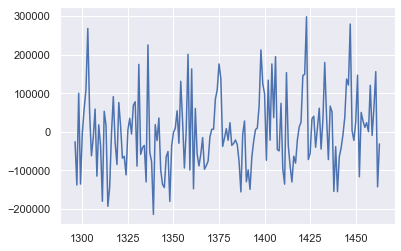

In [711]:
resid_xg = y - yhat
plt.plot(resid_xg)
plt.show()

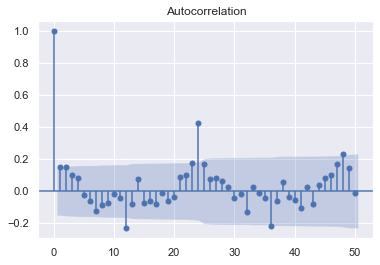

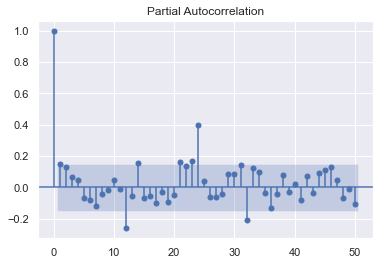

In [714]:
plot_acf(resid_xg, lags=50)
plot_pacf(resid_xg, lags=50)
plt.show()

InvalidIndexError: (slice(None, -24, None), slice(None, None, None))